In [12]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [13]:
def load_results(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [14]:
dataset_name = "housing"


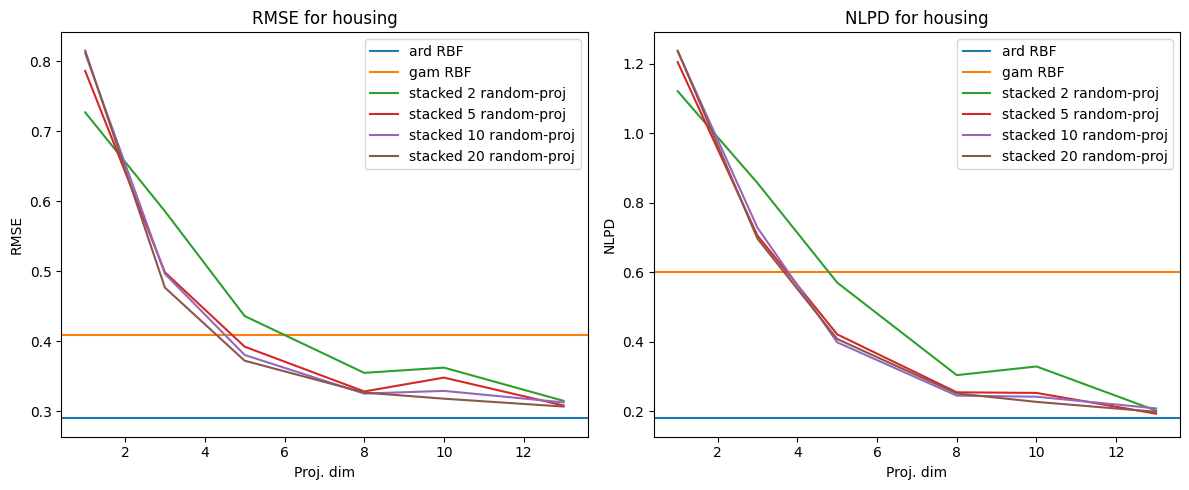

In [15]:
# Stacking of independently learned GPs with projections and fixed weights
save_path = "../results_stack_rand_proj/"
dataset_path = os.path.join(save_path, f"{dataset_name}_results.pkl")

results = load_results(dataset_path)

cmap = plt.get_cmap("tab10")

plt.figure(figsize=(12, 5))

# data = Dataset(dataset_name)
# proj_dim_vals = np.linspace(1, data.x.shape[1], num_proj_dim_vals).astype(int)

# Plot RMSE
plt.subplot(1, 2, 1)
plt.axhline(results["single_gp"][1].mean(), label="ard RBF", color=cmap(0))
# plt.axhline(results["single_gp"][1].mean() - results["single_gp"][1].std() / np.sqrt(10), color=cmap(0), linestyle='dashed')
# plt.axhline(results["single_gp"][1].mean() + results["single_gp"][1].std() / np.sqrt(10), color=cmap(0), linestyle='dashed')
plt.axhline(results["gam_gp"][1].mean(), label="gam RBF", color=cmap(1))
# plt.axhline(results["gam_gp"][1].mean() - results["gam_gp"][1].std() / np.sqrt(10), color=cmap(1), linestyle='dashed')
# plt.axhline(results["gam_gp"][1].mean() + results["gam_gp"][1].std() / np.sqrt(10), color=cmap(1), linestyle='dashed')

for i, stacked_result in enumerate(results["stacked_proj_gp_batched"]):
    plt.plot(stacked_result["proj_dim_vals"], stacked_result["rmse"], label=f"stacked {stacked_result['num_projections']} random-proj", color=cmap(2 + i % 8))

plt.ylabel("RMSE")
plt.xlabel("Proj. dim")
plt.legend()
plt.title(f"RMSE for {dataset_name}")

# Plot NLPD
plt.subplot(1, 2, 2)
plt.axhline(results["single_gp"][0].mean(), label="ard RBF", color=cmap(0))
plt.axhline(results["gam_gp"][0].mean(), label="gam RBF", color=cmap(1))
for i, stacked_result in enumerate(results["stacked_proj_gp_batched"]):
    plt.plot(stacked_result["proj_dim_vals"], stacked_result["nlpd"], label=f"stacked {stacked_result['num_projections']} random-proj", color=cmap(2 + i % 8))

plt.ylabel("NLPD")
plt.xlabel("Proj. dim")
plt.legend()
plt.title(f"NLPD for {dataset_name}")

plt.tight_layout()

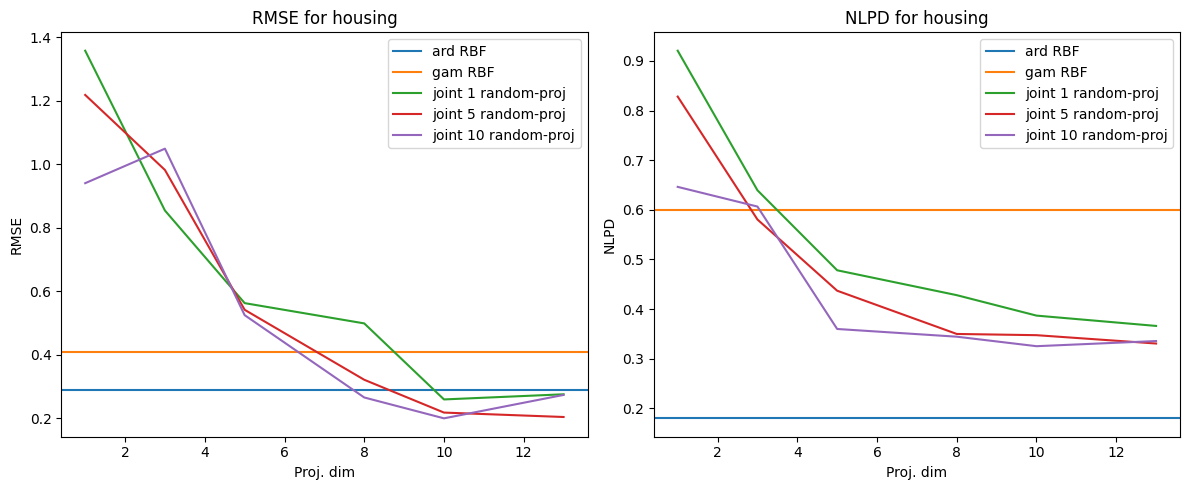

In [19]:
# Joint learning of GP experts' hyperparameters and constant weights with projections and pre-projection
save_path = "../results/"


cmap = plt.get_cmap("tab10")

plt.figure(figsize=(12, 5))

# data = Dataset(dataset_name)
# proj_dim_vals = np.linspace(1, data.x.shape[1], num_proj_dim_vals).astype(int)

# Plot RMSE
plt.subplot(1, 2, 1)
plt.axhline(results["single_gp"][1].mean(), label="ard RBF", color=cmap(0))
# plt.axhline(results["single_gp"][1].mean() - results["single_gp"][1].std() / np.sqrt(10), color=cmap(0), linestyle='dashed')
# plt.axhline(results["single_gp"][1].mean() + results["single_gp"][1].std() / np.sqrt(10), color=cmap(0), linestyle='dashed')
plt.axhline(results["gam_gp"][1].mean(), label="gam RBF", color=cmap(1))
# plt.axhline(results["gam_gp"][1].mean() - results["gam_gp"][1].std() / np.sqrt(10), color=cmap(1), linestyle='dashed')
# plt.axhline(results["gam_gp"][1].mean() + results["gam_gp"][1].std() / np.sqrt(10), color=cmap(1), linestyle='dashed')




# for i, stacked_result in enumerate(results["stacked_proj_gp_batched"]):
for i,num_projs in enumerate([1,5,10]):
    nlpd = []
    for proj_dim in [1,3,5,8,10,13]:
        dataset_path = os.path.join(save_path, f"{dataset_name}_num_projs_{num_projs}_proj_dim_{proj_dim}.npz")
        results_joint = np.load(dataset_path)
        nlpd.append(results_joint["nlpd"].mean())
    plt.plot([1,3,5,8,10,13], nlpd, label=f"joint {num_projs} random-proj", color=cmap(2 + i ))




plt.ylabel("RMSE")
plt.xlabel("Proj. dim")
plt.legend()
plt.title(f"RMSE for {dataset_name}")

# Plot NLPD
plt.subplot(1, 2, 2)
plt.axhline(results["single_gp"][0].mean(), label="ard RBF", color=cmap(0))
plt.axhline(results["gam_gp"][0].mean(), label="gam RBF", color=cmap(1))
for i,num_projs in enumerate([1,5,10]):
    rmse = []
    for proj_dim in stacked_result["proj_dim_vals"]:
        dataset_path = os.path.join(save_path, f"{dataset_name}_num_projs_{num_projs}_proj_dim_{proj_dim}.npz")
        results_joint = np.load(dataset_path)
        rmse.append(results_joint["rmse"].mean())

    plt.plot([1,3,5,8,10,13], rmse , label=f"joint {num_projs} random-proj", color=cmap(2 + i ))

plt.ylabel("NLPD")
plt.xlabel("Proj. dim")
plt.legend()
plt.title(f"NLPD for {dataset_name}")

plt.tight_layout()